Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
#Importar document:
dades = pd.read_csv("dataset/DelayedFlights.csv")

#Obtenir informació del dataset i netajar-ho de variables innecessàries:
#dades.head()
#dades.info
#dades.isnull().sum()

del dades["Unnamed: 0"]
del dades["TailNum"]
del dades["TaxiIn"]
del dades["TaxiOut"]
del dades["Year"]
del dades["FlightNum"]


Fes un informe complet del data set:.

Resumeix estadísticament les columnes d’interès.

Troba quantes dades faltants hi ha per columna.

Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).

Taula de les aerolínies amb més endarreriments acumulats.

Quins són els vols més llargs? I els més endarrerits?

Etc.

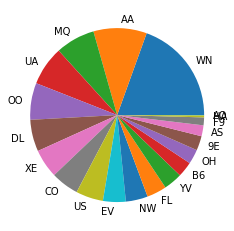

In [84]:
#Dades on es localitzen els retards acumulats: per aerolínia, aeroport, dia de la setmana i hora del dia
#Aquestes variables són importants però no podem realitzar un anàlisi estadístic univariable que sigui rellevant 
#(ie no podem fer la mitja de les companyies aèries)
    #Aerolínies que registren més retards (ja que cada entrada al dataset és un retard)

x = dades["UniqueCarrier"].value_counts()
noms = dades["UniqueCarrier"].value_counts().index.values

plt.pie(x, labels = noms)
plt.show()

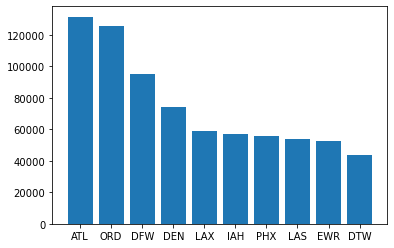

In [85]:
#Aeroports que registren més retards
    
aseaet = dades["Origin"].value_counts().sort_values(ascending = False)[:10]


y = aseaet
x = aseaet.index.values

plt.bar(x, y)
plt.show()

In [ ]:
#Dies amb més retard (dilluns=1)
    
x = dades["DayOfWeek"].value_counts().index.values
y = dades["DayOfWeek"].value_counts()

plt.bar(x, y)
plt.show()

In [ ]:
#Hores amb més retard

x = dades["CRSDepTime"].value_counts().index.values
y = dades["CRSDepTime"].value_counts()

plt.bar(x, y)
plt.show()

In [ ]:
#Dades estadístiques de com de tard arriben els vols amb retard

filtrat = dades[dades["ArrDelay"] < 300]

x = filtrat["ArrDelay"].value_counts().index.values
y = filtrat["ArrDelay"].value_counts()

plt.bar(x, y)
plt.show()

In [ ]:
#Dades faltants per columna:

dades.isnull().sum()

In [ ]:
#Al haver milions de casos, podem suprimir els casos que mostren valors nuls 
#sense por a perdre capacitat d'anàlisi estadístic

dades.dropna(inplace=True)

dades.isnull().sum()

In [ ]:
#Columna de velocitat mitjana del vol:

def velocitat(temps, distancia):
    if (temps == 0):
        return 0
    else:
        return distancia / temps

dades["AvSpeed"] = dades.apply(lambda x: velocitat(x["AirTime"], x["Distance"]), axis=1)

#dades[["AirTime", "Distance", "AvSpeed"]].head(15)

#Velocitat mitjana en milles per minut

In [ ]:
x = dades["AvSpeed"]

plt.hist(x, range= (x.min(), 10))
plt.show()

In [ ]:
#Vols més endarrerits:

dades.sort_values(by=["ArrDelay"], ascending=False, inplace=True)

dades[["DepTime","CRSArrTime", "ArrTime", "CRSArrTime", "ArrDelay"]].head(20)



In [ ]:
#Vols més llargs:

dades.sort_values(by=["ActualElapsedTime"], ascending=False, inplace=True)

dades.head(20)


Exporta el data set net i amb les noves columnes a Excel:

In [ ]:
#El fitxer és massa gran per a ser exportat a Excel mitjançant .to_excel()
dades.to_csv("Nou Fitxer")